<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [5]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
print(f"в датасете нашлось {df_train.isna().sum().sum()} пропусков")
print(f"Пропущенные значения наблюдаются в {df_train.columns[df_train.isna().any()].to_list()} столбцах")

в датасете нашлось 1005 пропусков
Пропущенные значения наблюдаются в ['mileage', 'engine', 'max_power', 'torque', 'seats'] столбцах


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [7]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = [np.nan if str(value).split(' ')[0] == '' else str(value).split(' ')[0] for value in df_train[col]]
    df_train[col] = df_train[col].astype(float)


    df_test[col] = [np.nan if str(value).split(' ')[0] == '' else str(value).split(' ')[0] for value in df_test[col]]
    df_test[col] = df_test[col].astype(float)


df_train.fillna(df_train.select_dtypes([int, float]).median(), inplace=True)
df_test.fillna(df_train.select_dtypes([int, float]).median(), inplace=True)

print(f"в датасете нашлось {df_train.drop(['torque', 'seats'], axis=1).isna().sum().sum()} пропусков")

в датасете нашлось 0 пропусков


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [8]:
print(f"в датасете {len(df_train.drop('selling_price', axis=1).loc[df_train.drop('selling_price', axis=1).duplicated()])} дубликатов")

df_train.drop('selling_price', axis=1).loc[df_train.drop('selling_price', axis=1).duplicated()]

в датасете 1159 дубликатов


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [9]:
price = df_train['selling_price']
new_train = df_train.drop('selling_price', axis=1).drop_duplicates(keep='first')
new_train['price'] = price.loc[price.index.isin(new_train.index)]
new_train.reset_index(inplace=True, drop=True)
new_train.shape

(5840, 13)

In [10]:
# assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [11]:
for col in ['mileage', 'engine', 'max_power']:
    new_train[col] = [str(value).split(' ')[0] for value in new_train[col]]
    new_train[col] = new_train[col].astype(float)

    df_test[col] = [str(value).split(' ')[0] for value in df_test[col]]
    df_test[col] = df_test[col].astype(float)


new_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [12]:
new_train['engine'] = new_train['engine'].astype(int)
new_train['seats'] = new_train['seats'].astype(int)


df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [13]:
new_train.select_dtypes([int, float]).describe()

,year,km_driven,mileage,engine,max_power,seats,price
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5.840000e+03
mean,2013.428425,7.395224e+04,19.428611,1429.448973,87.910782,5.426712,5.229601e+05
std,4.095622,6.007114e+04,3.986026,485.662834,31.639585,0.982344,5.354320e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,2.000000,2.999900e+04
25%,2011.000000,3.900000e+04,16.950000,1197.000000,68.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,19.300000,1248.000000,81.860000,5.000000,4.050000e+05
75%,2017.000000,1.000000e+05,22.300000,1498.000000,99.000000,5.000000,6.400000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


In [14]:
df_test.select_dtypes([int, float]).describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [15]:
new_train.select_dtypes([object]).describe()

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [16]:
df_test.select_dtypes([object]).describe()

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [17]:
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

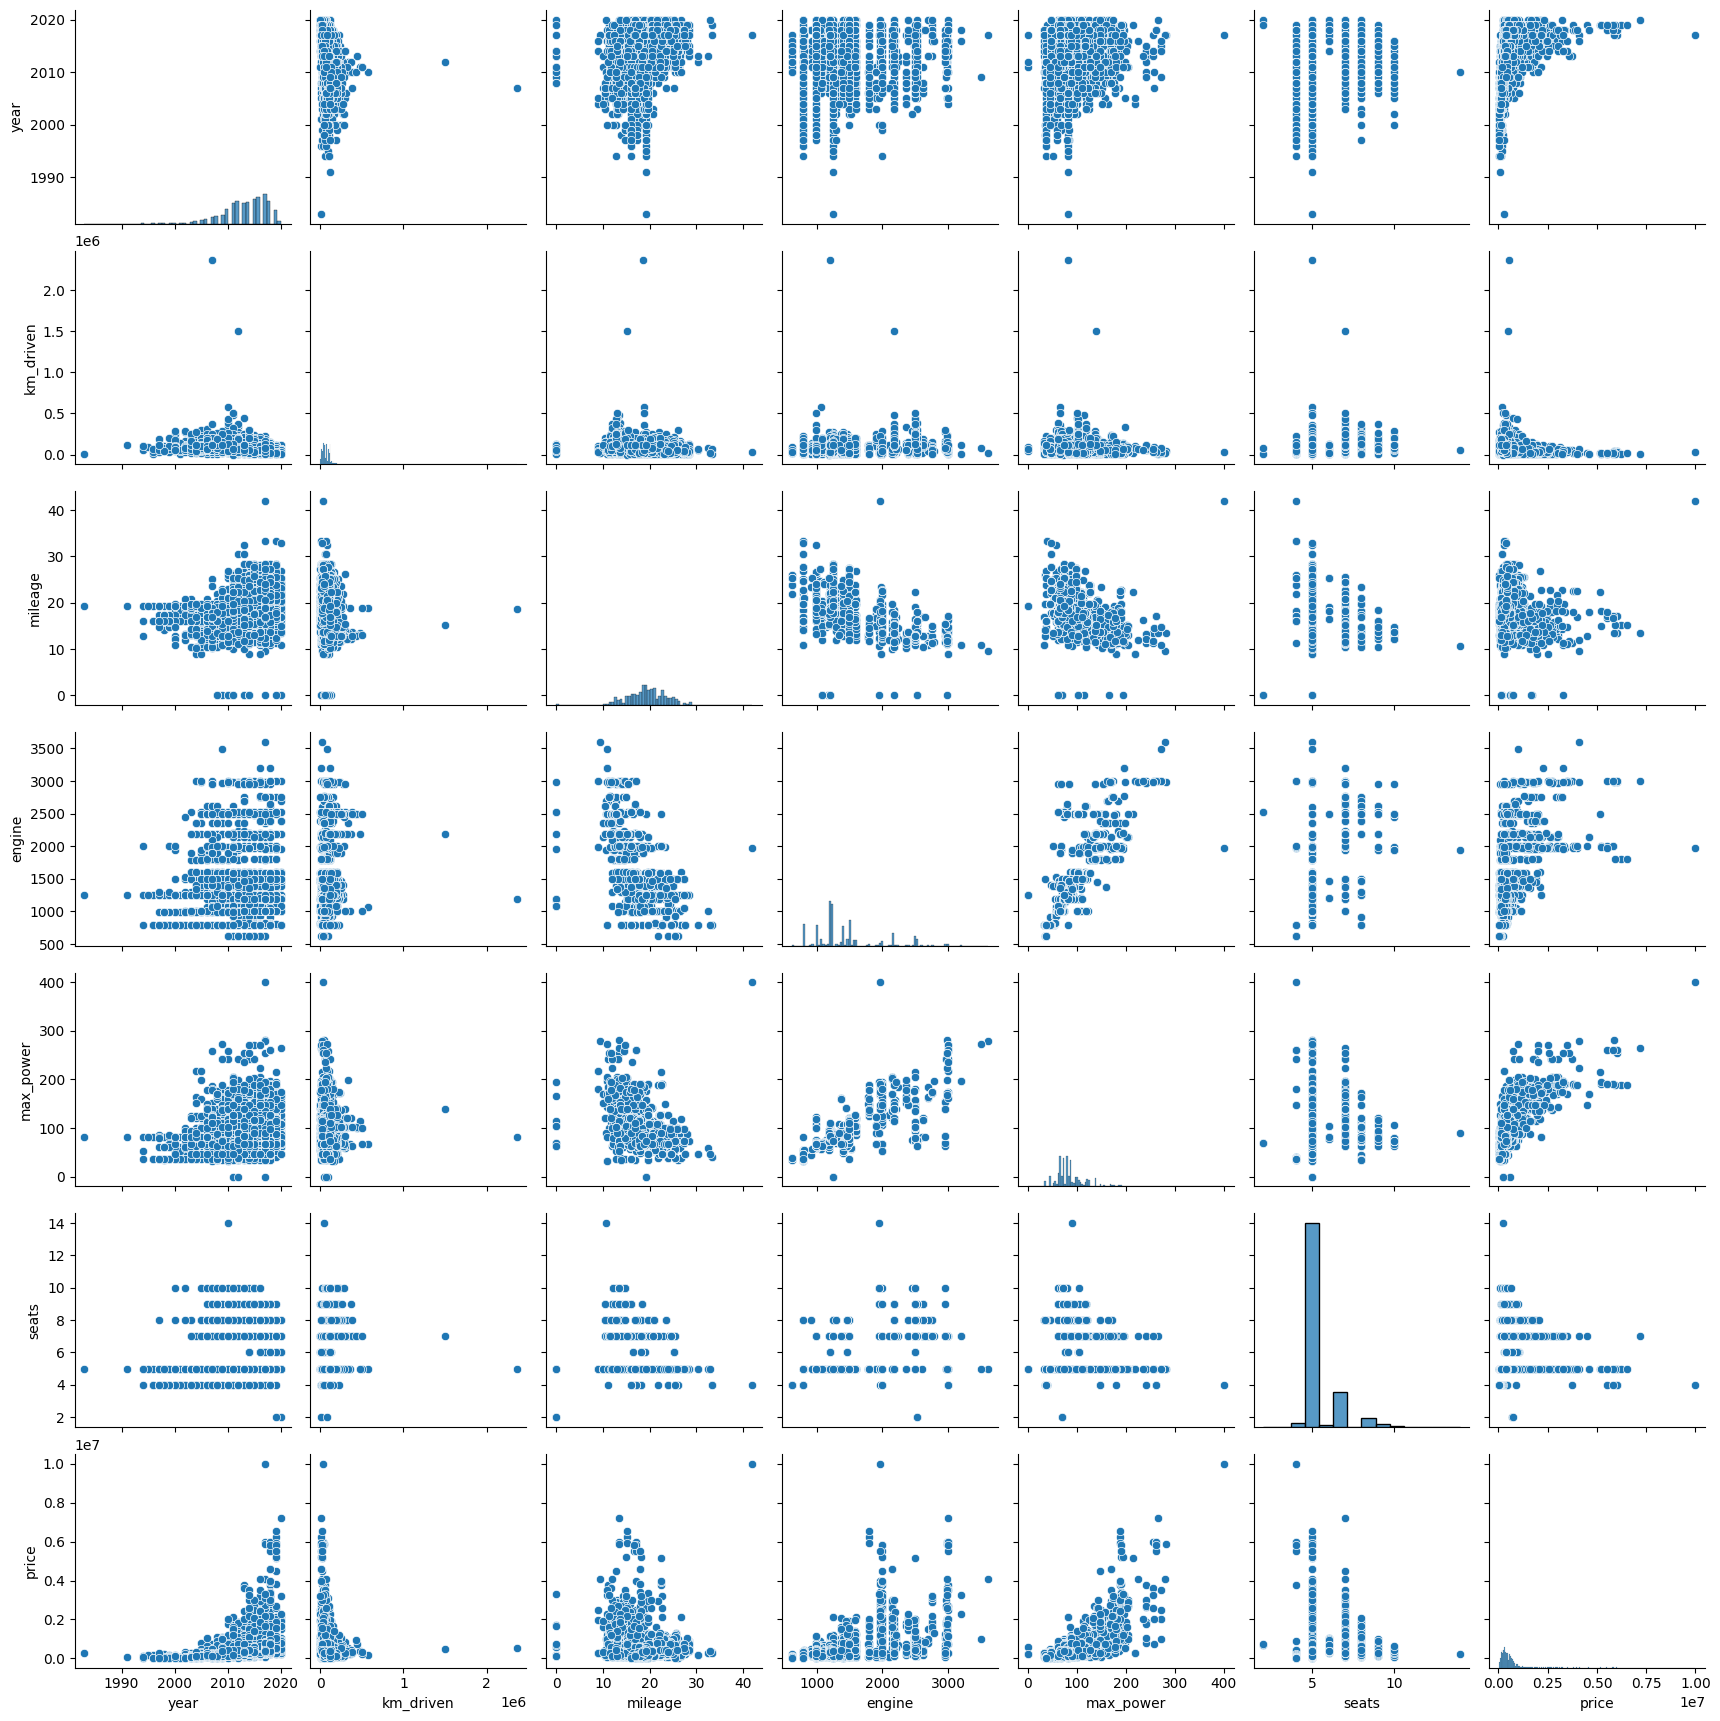

In [18]:
sns.pairplot(new_train.select_dtypes([int, float]))
#### да, можно. На рисунке видны базовые зависимости от цены, например, мы видим, чем новее машина тем дороже она стоит
### да можно

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

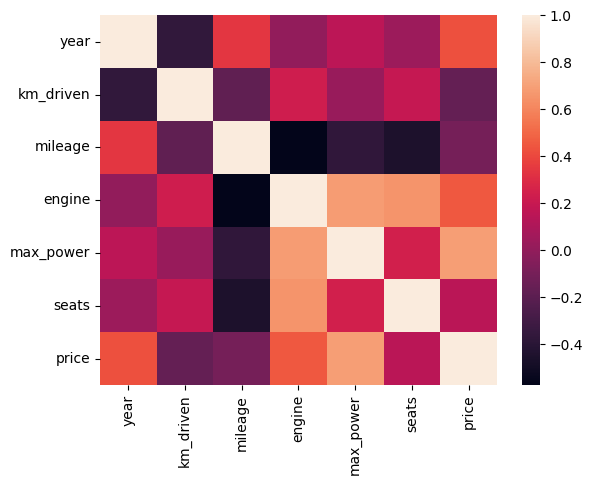

In [19]:
corr = new_train.corr(method='pearson', numeric_only=True)
sns.heatmap(corr)

# engine & mileage kn_driven & year and mileage & seats наименее коррелированы между собой
# да, чем меньше год тем больше проехала машина к дате продажи 

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

<Axes: >

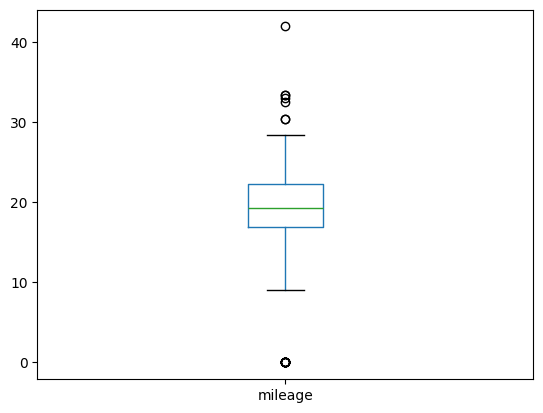

In [20]:
# chack if there are outliers 
col = 'mileage'

new_train.boxplot(column =[col], grid = False)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [21]:
old_train_df = new_train.copy(deep=True)
old_test_df = df_test.copy(deep=True)

y_train = new_train['price']
X_train = old_train_df.drop(['price', 'fuel', 'seller_type', 'transmission', 'owner', 'name'], axis=1)

y_test = df_test['selling_price']
X_test = old_test_df.drop(['selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'name'], axis=1)

In [22]:
# assert X_train.shape == (5840, 6)

In [23]:
# assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()
model.fit(X_train, y_train)

y_pred_1 = model.predict(X_test)

print(f"MSE score base model {MSE(y_test, y_pred_1)}")
print(f"R2 score base model {r2_score(y_test, y_pred_1)}")

MSE score base model 233297548204.61337
R2 score base model 0.5941441219017086


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [26]:
model_2 = LinearRegression()

model_2.fit(scaled_train, y_train)

y_pred_2 = model.predict(scaled_test)

print(f"MSE score scaled model {MSE(y_test, y_pred_2)}")
print(f"R2 score scaled model {r2_score(y_test, y_pred_2)}")

coef = pd.DataFrame(data=np.array([model_2.coef_]), columns=X_train.columns)

coef = abs(coef).T
coef
# max power наиболее информативный 

MSE score scaled model 5817794020024900.0
R2 score scaled model -10119.92033869691


c:\Users\X\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,0
year,152843.262358
km_driven,44148.047511
mileage,28781.086595
engine,61176.857150
max_power,322779.703236
seats,23220.570226


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()  
lasso_model.fit(scaled_train, y_train)

y_pred_3 = lasso_model.predict(scaled_test)

print(f"MSE score lass0 model {MSE(y_test, y_pred_3)}")
print(f"R2 score lass0 model {r2_score(y_test, y_pred_3)}")




MSE score lass0 model 233298219170.76022
R2 score lass0 model 0.5941429546560312


In [28]:
pd.DataFrame(data=np.array([lasso_model.coef_]), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152843.083853,-44146.918538,28779.204085,61172.02578,322780.586197,-23217.693273


In [29]:
pd.DataFrame(data=np.array([model_2.coef_]), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152843.262358,-44148.047511,28781.086595,61176.85715,322779.703236,-23220.570226


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [30]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.arange(0.01, 1.0, 0.01)}

start = datetime.now()

grid_search = GridSearchCV(Lasso(), param_grid=param_grid, cv=10, scoring = 'r2')
grid_search.fit(scaled_train, y_train)



best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

end = datetime.now()

print(f"грид обучал модель {(end - start).seconds} секунды")
print(f"коэфф регуляризации {best_params['alpha']}")

y_pred_4 = best_model.predict(X_test)

print(f"MSE score best model {MSE(y_test, y_pred_4)}")
print(f"R2 score best model {r2_score(y_test, y_pred_4)}")

### веса не занулились 

грид обучал модель 2 секунды
коэфф регуляризации 0.99
MSE score best model 1.1966464085569858e+19
R2 score best model -20817447.90401117


c:\Users\X\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [31]:
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.arange(0.01, 1.0, 0.01), 'l1_ratio': np.arange(0.01, 1.0, 0.01)}

start = datetime.now()

grid_search = GridSearchCV(ElasticNet(), param_grid=param_grid, cv=10, scoring = 'r2')
grid_search.fit(scaled_train, y_train)



best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

end = datetime.now()

print(f"грид обучал модель {(end - start).seconds} секунды")
print(f"коэфф регуляризации {best_params['alpha']}")

y_pred_5 = best_model.predict(X_test)

print(f"MSE score best model {MSE(y_test, y_pred_5)}")
print(f"R2 score best model {r2_score(y_test, y_pred_5)}")


грид обучал модель 179 секунды
коэфф регуляризации 0.97
MSE score best model 1.31738540932469e+19
R2 score best model -22917882.88733595


c:\Users\X\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [32]:
# old_train_df = old_train_df.drop('name', axis=1)
# old_test_df = old_test_df.drop('name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [33]:
old_train_df['name'] = old_train_df.name.apply(lambda x: x.split(' ')[0])
old_test_df['name'] = old_test_df.name.apply(lambda x: x.split(' ')[0])

## Оставим Только марку автомобиля

In [34]:
old_train_df.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [35]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
old_train_df['seats'] = old_train_df['seats'].astype(object)
old_test_df['seats'] = old_test_df['seats'].astype(object)

ytrain = old_train_df['price']
ytest = old_test_df['selling_price']


old_train_df.drop('price', axis=1, inplace=True)

old_test_df.drop('selling_price', axis=1, inplace=True)


new_train = pd.get_dummies(old_train_df, drop_first=True)
new_test = pd.get_dummies(old_test_df, drop_first=True)


In [36]:
tr_df = old_train_df.drop('name', axis=1)
tt_df = old_test_df.drop('name', axis=1)

new_train = pd.get_dummies(tr_df, drop_first=True)
new_test = pd.get_dummies(tt_df, drop_first=True)


unique_columns = set(new_train.columns.to_list() + new_test.columns.to_list())

for col in unique_columns:
    if col not in new_train.columns:
        new_train[col] = False

    if col not in new_test.columns:
        new_test[col] = False

new_train = new_train.sort_index(axis=1)
new_test= new_test.sort_index(axis=1)


In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0.01, 1.0, 0.01)}


grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=10, scoring = 'r2')
grid_search.fit(new_train, ytrain)



best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print(f"коэфф регуляризации {best_params['alpha']}")
print(best_model)


y_pred_6 = best_model.predict(new_test)


print(f"MSE score best model {MSE(y_test, y_pred_6)}")
print(f"R2 score best model {r2_score(y_test, y_pred_6)}")

## при добавлении категориальных признаков модель очень сильно улучшилась 

коэфф регуляризации 0.99
Ridge(alpha=np.float64(0.99))
MSE score best model 212748697049.04626
R2 score best model 0.6298919130544014


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

old_train_df['seats'] = old_train_df['seats'].astype(object)
old_test_df['seats'] = old_test_df['seats'].astype(object)


new_train = pd.get_dummies(old_train_df, drop_first=True)
new_test = pd.get_dummies(old_test_df, drop_first=True)

unique_columns = set(new_train.columns.to_list() + new_test.columns.to_list())

for col in unique_columns:
    if col not in new_train.columns:
        new_train[col] = False

    if col not in new_test.columns:
        new_test[col] = False

new_train = new_train.sort_index(axis=1)
new_test= new_test.sort_index(axis=1)



param_grid = {'alpha': np.arange(0.01, 1.0, 0.01)}


grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=10, scoring = 'r2')
grid_search.fit(new_train, ytrain)



best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print(f"коэфф регуляризации {best_params['alpha']}")
print(best_model)



y_pred_7 = best_model.predict(new_test)


print(f"MSE score best model {MSE(y_test, y_pred_7)}")
print(f"R2 score best model {r2_score(y_test, y_pred_7)}")

## при добавлении категориальных признаков модель очень сильно улучшилась и не зря преобразовали переменную name (результат улучшился с 0.63 до 0.78)

коэфф регуляризации 0.99
Ridge(alpha=np.float64(0.99))
MSE score best model 126970213155.92421
R2 score best model 0.7791163784219065


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(predictions, actuals):

    limit = (predictions >= actuals*0.9) & (predictions <= actuals*1.1)
    
    return np.mean(limit)
    
for i in (y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7):

    print(f"Результаты метрики по модели следующие: {business_metric(i, ytest)}")

# лучшая модель - последняя модель

Результаты метрики по  модели следующие: 0.227
Результаты метрики по  модели следующие: 0.0
Результаты метрики по  модели следующие: 0.227
Результаты метрики по  модели следующие: 0.0
Результаты метрики по  модели следующие: 0.0
Результаты метрики по  модели следующие: 0.248
Результаты метрики по  модели следующие: 0.307


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

